In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor

In [29]:
df = pd.read_csv("HousePrices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Data Cleaning

In [31]:
missing_ratio= df.apply(lambda x:sum(x.isnull())/len(df))

In [32]:
missing_ratio.sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

##### I will directly get ride of first 4 columns. Because missing ratio is atleast %80 in this columns

In [33]:
#missing_ratio.sort_values(ascending=False).head(10)
top_missing=missing_ratio.sort_values(ascending=False).head(4)

In [34]:
df=df.drop(top_missing.index, axis=1)

##### Check for missing values in other columns

In [35]:
NumberOfnulls = df.isnull().sum().sort_values(ascending=False)
NumberOfnulls

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofMatl           0
RoofStyle          0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [36]:
df[df['FireplaceQu'].isnull()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [37]:
df[df['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [38]:
df['FireplaceQu'].fillna('NO',inplace=True)

##### When we check missing value of FireplaceQu we see that this areas is not fire places. So I filled them with NO.

In [39]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageType        81
GarageCond        81
GarageQual        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofStyle          0
RoofMatl           0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
Condition1         0
                ... 
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
Functional         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Fireplaces         0
TotRmsAbvGrd       0
BsmtUnfSF          0
LowQualFinSF       0
TotalBsmtSF        0
SaleCondition

In [40]:
df[["LotFrontage","MasVnrArea","MasVnrType","Electrical"]].head(10)

,LotFrontage,MasVnrArea,MasVnrType,Electrical
0,65.0,196.0,BrkFace,SBrkr
1,80.0,0.0,None,SBrkr
2,68.0,162.0,BrkFace,SBrkr
3,60.0,0.0,None,SBrkr
4,84.0,350.0,BrkFace,SBrkr
5,85.0,0.0,None,SBrkr
6,75.0,186.0,Stone,SBrkr
7,NaN,240.0,Stone,SBrkr
8,51.0,0.0,None,FuseF
9,50.0,0.0,None,SBrkr


In [41]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [43]:
df['LotFrontage'] =df['LotFrontage'].fillna(value=df['LotFrontage'].mean())
df['MasVnrArea'] =df['MasVnrArea'].fillna(value=df['MasVnrArea'].mean())
df['MasVnrType'] =df['MasVnrType'].fillna('None')
df.Electrical = df.Electrical.fillna('SBrkr')

##### "LotFrontage","MasVnrArea","MasVnrType","Electrical" are other columns which have missing values. I filled them with mean value and mod for strings

In [44]:
df.isnull().sum().sort_values(ascending=False)

GarageQual       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
MasVnrType        0
Exterior2nd       0
OverallCond       0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtFinSF1        0
YearBuilt         0
SalePrice         0
OverallQual       0
LandContour       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
3SsnPorch         0
Functional        0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
Fireplaces        0
TotRmsAbvGrd      0
TotalBsmtSF       0
LowQualFinSF      0
SaleCondition     0
HeatingQC         0
CentralAir        0
Electrical        0


In [45]:
df[df['GarageYrBlt'].isnull()][['GarageType','GarageCond','GarageFinish','GarageYrBlt','GarageQual']]

,GarageType,GarageCond,GarageFinish,GarageYrBlt,GarageQual
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [46]:
df.dropna(subset=['GarageType','GarageCond','GarageFinish','GarageYrBlt','GarageQual'],inplace=True)


#### As it seen 'GarageType','GarageCond','GarageFinish','GarageYrBlt','GarageQual' all off them are NaN for same 81 sample. So I  droped this rows.

In [47]:
df[df['BsmtExposure'].isnull()][['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN


In [48]:
df.dropna(subset=['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'],inplace=True)

##### As it seen 'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual' all off them are NaN for same 81 sample. So I droped this rows.

In [49]:
df.isnull().sum().sum()

0

##### Now we have clean data set

# Feature Elemination

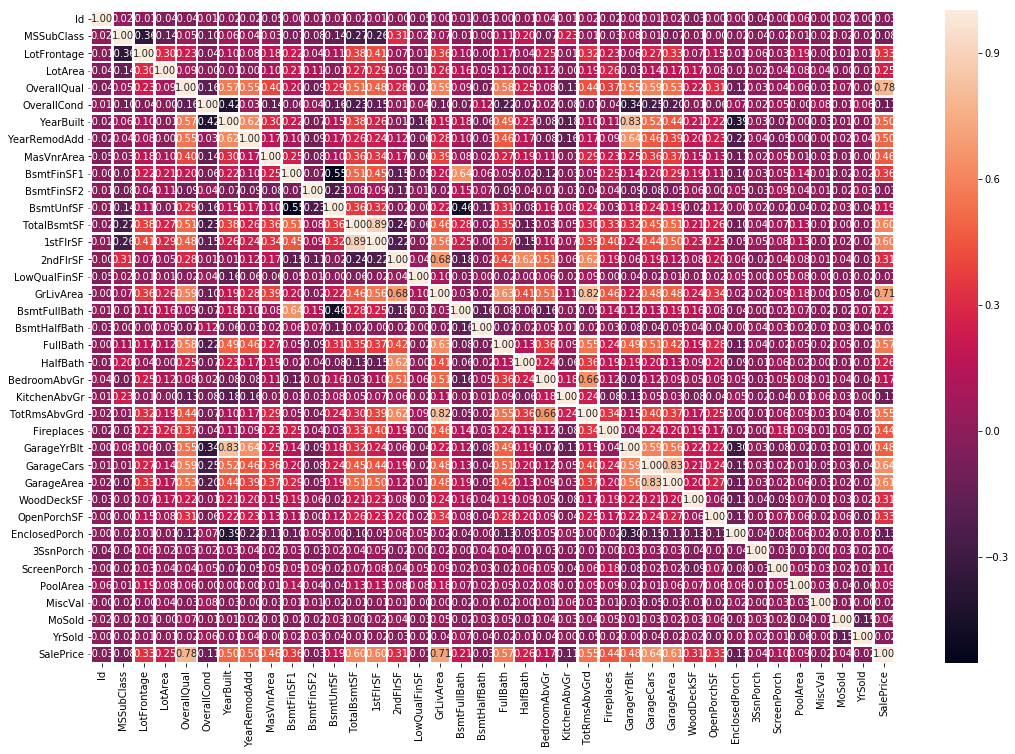

In [50]:
corr = df.corr()

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Dummies

In [51]:
df = pd.get_dummies(df)

In [52]:
X= df.drop(['SalePrice'],axis = 1)
y = df.SalePrice

In [53]:
#split data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123)
# Standardizing the features
scaler = StandardScaler()
scaler.fit(X_train)                
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [54]:
#Using PCA for dimensionality reduction
pca= PCA(23)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
np.cumsum(pca.explained_variance_ratio_)

array([0.06889015, 0.10087816, 0.12846859, 0.14992385, 0.16765551,
       0.18463448, 0.19991739, 0.21375002, 0.22669432, 0.23926747,
       0.25180202, 0.26368584, 0.27512373, 0.28587855, 0.29651097,
       0.30688822, 0.31689291, 0.32676686, 0.33646649, 0.34601899,
       0.35538112, 0.36454928, 0.37358984])

##### Firstly I standardize my dataset and used PCA to eleminate feaure. Thanks to PCA we get ride of multicollinearity and homoscedasticity

## Models

### Linear Regression

In [55]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.8739615811544595

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 20913.245447688907
RMSE: 27678.263141160493


### Tree Based Models

### Decision Trees

In [59]:
list=[20,30,40,50,60,70,80]
for i in list:
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)  
    dt.fit(X_train, y_train)  
    predictions = dt.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Mean Absolute Error for {} max depth is :'.format(i) , round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error for 20 max depth is : 39671.71 degrees.
Mean Absolute Error for 30 max depth is : 33503.63 degrees.
Mean Absolute Error for 40 max depth is : 36717.41 degrees.
Mean Absolute Error for 50 max depth is : 36593.64 degrees.
Mean Absolute Error for 60 max depth is : 34106.51 degrees.
Mean Absolute Error for 70 max depth is : 34679.09 degrees.
Mean Absolute Error for 80 max depth is : 34679.09 degrees.


With 30 max depth we found best result

### Random Forest

In [61]:
list=[20,30,40,50,60,70,80,100,120,140,160]
for i in list:
    rf = RandomForestRegressor(n_estimators=i, random_state=42)  
    rf.fit(X_train, y_train)  
    predictions = rf.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Mean Absolute Error for {} estimator is :'.format(i) , round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error for 20 estimator is : 20149.48 degrees.
Mean Absolute Error for 30 estimator is : 20218.47 degrees.
Mean Absolute Error for 40 estimator is : 20377.23 degrees.
Mean Absolute Error for 50 estimator is : 20403.78 degrees.
Mean Absolute Error for 60 estimator is : 20193.43 degrees.
Mean Absolute Error for 70 estimator is : 20056.33 degrees.
Mean Absolute Error for 80 estimator is : 20017.53 degrees.
Mean Absolute Error for 100 estimator is : 19863.85 degrees.
Mean Absolute Error for 120 estimator is : 19751.75 degrees.
Mean Absolute Error for 140 estimator is : 19776.38 degrees.
Mean Absolute Error for 160 estimator is : 19841.21 degrees.


With 120 estimator we found best result

### XGBoost

In [62]:
list=[20,30,40,50,60,70,80,100,120,140,160]
for i in list:
    gbm = xgb.XGBClassifier(n_estimators=i, random_state=42)  
    gbm.fit(X_train, y_train)  
    predictions = gbm.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Mean Absolute Error for {} estimator is :'.format(i) , round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error for 20 estimator is : 33880.62 degrees.
Mean Absolute Error for 30 estimator is : 35493.21 degrees.
Mean Absolute Error for 40 estimator is : 34663.96 degrees.
Mean Absolute Error for 50 estimator is : 33066.92 degrees.
Mean Absolute Error for 60 estimator is : 33226.51 degrees.
Mean Absolute Error for 70 estimator is : 33085.44 degrees.
Mean Absolute Error for 80 estimator is : 33203.96 degrees.
Mean Absolute Error for 100 estimator is : 34951.82 degrees.
Mean Absolute Error for 120 estimator is : 34749.88 degrees.
Mean Absolute Error for 140 estimator is : 34378.77 degrees.
Mean Absolute Error for 160 estimator is : 34685.44 degrees.


As we see XGBoost is failed here

### Support Vector Machine

In [63]:
list=[20,30,40,50,60,70,80,100,120,140,160]
for i in list:
    svc = SVC(gamma = 0.01, C = i) 
    svc.fit(X_train, y_train)  
    predictions = svc.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Mean Absolute Error for {} C is :'.format(i) , round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error for 20 C is : 25809.04 degrees.
Mean Absolute Error for 30 C is : 25794.41 degrees.
Mean Absolute Error for 40 C is : 25749.6 degrees.
Mean Absolute Error for 50 C is : 25757.0 degrees.
Mean Absolute Error for 60 C is : 25757.0 degrees.
Mean Absolute Error for 70 C is : 25757.0 degrees.
Mean Absolute Error for 80 C is : 25805.15 degrees.
Mean Absolute Error for 100 C is : 25805.15 degrees.
Mean Absolute Error for 120 C is : 25805.15 degrees.
Mean Absolute Error for 140 C is : 25825.89 degrees.
Mean Absolute Error for 160 C is : 25825.89 degrees.


With C value 100 and 120 we found best result

### Neural Network

In [72]:
list=[20,30,40,50,60,70,80,100,120,140,160]
for i in list:
    mlp = MLPRegressor(hidden_layer_sizes=(10*i,40))
    mlp.fit(X_train, y_train)  
    predictions = mlp.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Mean Absolute Error for {} C is :'.format(i) , round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error for 20 C is : 99071.22 degrees.
Mean Absolute Error for 30 C is : 50581.72 degrees.
Mean Absolute Error for 40 C is : 42886.73 degrees.
Mean Absolute Error for 50 C is : 31658.83 degrees.
Mean Absolute Error for 60 C is : 31711.31 degrees.
Mean Absolute Error for 70 C is : 26366.79 degrees.
Mean Absolute Error for 80 C is : 29242.93 degrees.
Mean Absolute Error for 100 C is : 26763.93 degrees.
Mean Absolute Error for 120 C is : 27387.04 degrees.
Mean Absolute Error for 140 C is : 25451.51 degrees.
Mean Absolute Error for 160 C is : 24819.58 degrees.


### Result

Best result belong to random forest algorithms